In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from salishsea_tools import viz_tools
import cmocean
%matplotlib inline

In [6]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
mesh = nc.Dataset('/data/vdo/MEOPAR/grid/mesh_mask201702.nc')

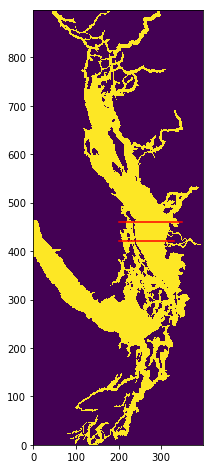

In [6]:
fig, ax = plt.subplots(figsize = (8,8))
ax.pcolormesh(mesh.variables['tmask'][0,0,...])
ax.plot((200, 350), (460,460), 'r')
ax.plot((200, 330), (420,420), 'r')
viz_tools.set_aspect(ax);

In [44]:
k = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2015.nc')

In [8]:
deptht = k.variables['deptht'][:]

In [11]:
plt.style.use('/ocean/vdo/MEOPAR/biomodelevalpaper/bioModelEvalPaper.mplstyle')

In [28]:
maska = mesh.variables['e3t_0'][:,:22,460,200:350]
maska = np.ma.masked_array(maska, mask = 1- mesh.variables['tmask'][:,:22,460,200:350])
maskb = mesh.variables['e3t_0'][:,:22,420,200:330]
maskb = np.ma.masked_array(maskb, mask = 1- mesh.variables['tmask'][:,:22,420,200:330])

# 2015

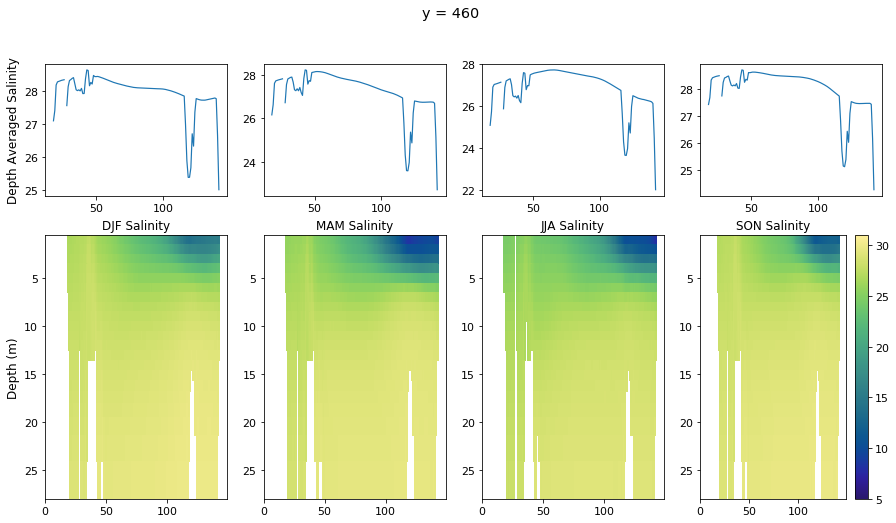

In [48]:
fig, ax = plt.subplots(2,4,figsize = (15,8), gridspec_kw = {'height_ratios':[1, 2]} )
for n in range(4):
    u = np.ma.masked_array(k.variables['vosaline'][n,:,460,200:350],
                           mask = 1 - mesh.variables['tmask'][0,:22,460,200:350])
    averaged = np.sum((u * maska), axis=1) / np.sum(maska, axis = 1)
    ax[0,n].plot(averaged[0,:])
ax[0,0].set_ylabel('Depth Averaged Salinity')
ax[1,0].pcolormesh(np.arange(150), deptht, 
                 np.ma.masked_array(k.variables['vosaline'][0,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,0].set_title('DJF Salinity')
ax[1,1].pcolormesh(np.arange(150), deptht,
                np.ma.masked_array(k.variables['vosaline'][1,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,1].set_title('MAM Salinity')
ax[1,2].pcolormesh(np.arange(150), deptht,
                np.ma.masked_array(k.variables['vosaline'][2,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,2].set_title('JJA Salinity')
h = ax[1,3].pcolormesh(np.arange(150), deptht,
                     np.ma.masked_array(k.variables['vosaline'][3,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                     cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
fig.colorbar(h, ax=ax[1,3])
ax[1,3].set_title('SON Salinity')
for a in ax[1,:]:
    a.set_ylim(28,0.5)
fig.suptitle('y = 460')
ax[1, 0].set_ylabel('Depth (m)');

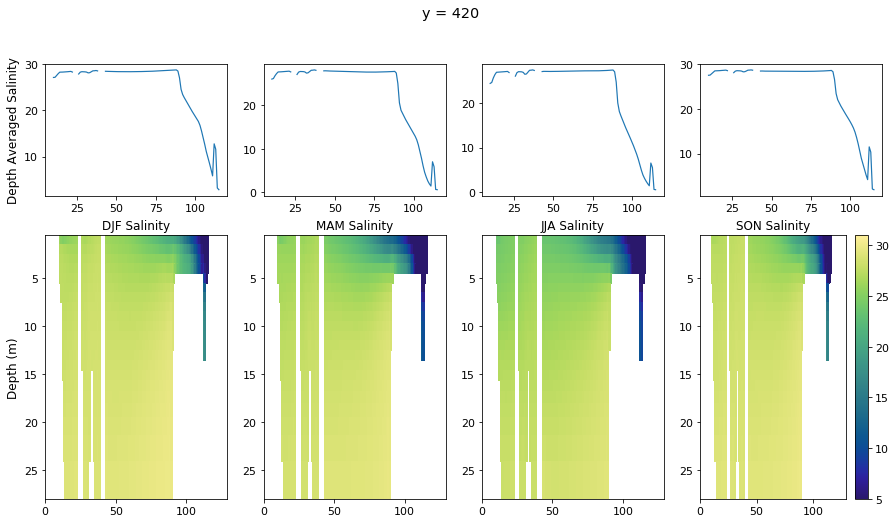

In [51]:
fig, ax = plt.subplots(2,4,figsize = (15,8), gridspec_kw = {'height_ratios':[1, 2]} )
for n in range(4):
    u = np.ma.masked_array(k.variables['vosaline'][n,:,420,200:330],
                           mask = 1 - mesh.variables['tmask'][0,:22,420,200:330])
    averaged = np.sum((u * maskb), axis=1) / np.sum(maskb, axis = 1)
    ax[0,n].plot(averaged[0,:])
ax[0,0].set_ylabel('Depth Averaged Salinity')
ax[1,0].pcolormesh(np.arange(130), deptht, 
                 np.ma.masked_array(k.variables['vosaline'][0,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,0].set_title('DJF Salinity')
ax[1,1].pcolormesh(np.arange(130), deptht,
                np.ma.masked_array(k.variables['vosaline'][1,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,1].set_title('MAM Salinity')
ax[1,2].pcolormesh(np.arange(130), deptht,
                np.ma.masked_array(k.variables['vosaline'][2,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,2].set_title('JJA Salinity')
h = ax[1,3].pcolormesh(np.arange(130), deptht,
                     np.ma.masked_array(k.variables['vosaline'][3,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                     cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
fig.colorbar(h, ax=ax[1,3])
ax[1,3].set_title('SON Salinity')
for a in ax[1,:]:
    a.set_ylim(28,0.5)
fig.suptitle('y = 420')
ax[1, 0].set_ylabel('Depth (m)');

# 2016

In [52]:
k = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2016.nc')

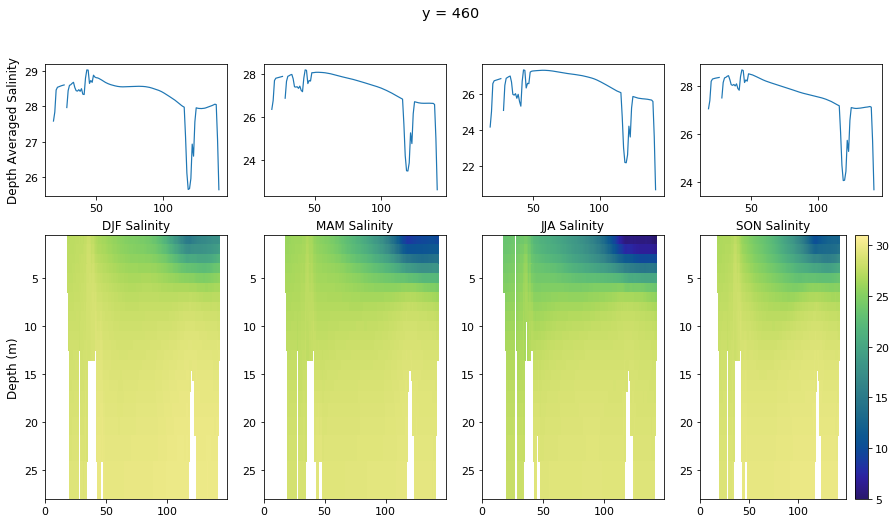

In [53]:
fig, ax = plt.subplots(2,4,figsize = (15,8), gridspec_kw = {'height_ratios':[1, 2]} )
for n in range(4):
    u = np.ma.masked_array(k.variables['vosaline'][n,:,460,200:350],
                           mask = 1 - mesh.variables['tmask'][0,:22,460,200:350])
    averaged = np.sum((u * maska), axis=1) / np.sum(maska, axis = 1)
    ax[0,n].plot(averaged[0,:])
ax[0,0].set_ylabel('Depth Averaged Salinity')
ax[1,0].pcolormesh(np.arange(150), deptht, 
                 np.ma.masked_array(k.variables['vosaline'][0,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,0].set_title('DJF Salinity')
ax[1,1].pcolormesh(np.arange(150), deptht,
                np.ma.masked_array(k.variables['vosaline'][1,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,1].set_title('MAM Salinity')
ax[1,2].pcolormesh(np.arange(150), deptht,
                np.ma.masked_array(k.variables['vosaline'][2,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,2].set_title('JJA Salinity')
h = ax[1,3].pcolormesh(np.arange(150), deptht,
                     np.ma.masked_array(k.variables['vosaline'][3,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                     cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
fig.colorbar(h, ax=ax[1,3])
ax[1,3].set_title('SON Salinity')
for a in ax[1,:]:
    a.set_ylim(28,0.5)
fig.suptitle('y = 460')
ax[1, 0].set_ylabel('Depth (m)');

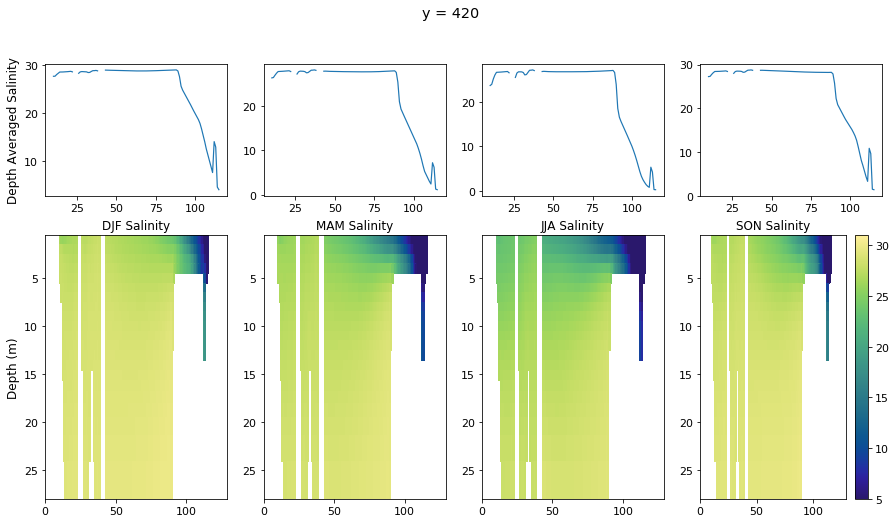

In [54]:
fig, ax = plt.subplots(2,4,figsize = (15,8), gridspec_kw = {'height_ratios':[1, 2]} )
for n in range(4):
    u = np.ma.masked_array(k.variables['vosaline'][n,:,420,200:330],
                           mask = 1 - mesh.variables['tmask'][0,:22,420,200:330])
    averaged = np.sum((u * maskb), axis=1) / np.sum(maskb, axis = 1)
    ax[0,n].plot(averaged[0,:])
ax[0,0].set_ylabel('Depth Averaged Salinity')
ax[1,0].pcolormesh(np.arange(130), deptht, 
                 np.ma.masked_array(k.variables['vosaline'][0,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,0].set_title('DJF Salinity')
ax[1,1].pcolormesh(np.arange(130), deptht,
                np.ma.masked_array(k.variables['vosaline'][1,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,1].set_title('MAM Salinity')
ax[1,2].pcolormesh(np.arange(130), deptht,
                np.ma.masked_array(k.variables['vosaline'][2,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,2].set_title('JJA Salinity')
h = ax[1,3].pcolormesh(np.arange(130), deptht,
                     np.ma.masked_array(k.variables['vosaline'][3,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                     cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
fig.colorbar(h, ax=ax[1,3])
ax[1,3].set_title('SON Salinity')
for a in ax[1,:]:
    a.set_ylim(28,0.5)
fig.suptitle('y = 420')
ax[1, 0].set_ylabel('Depth (m)');

# 2017

In [55]:
k = nc.Dataset('/data/vdo/MEOPAR/for-devin/seasonal-30_2017.nc')

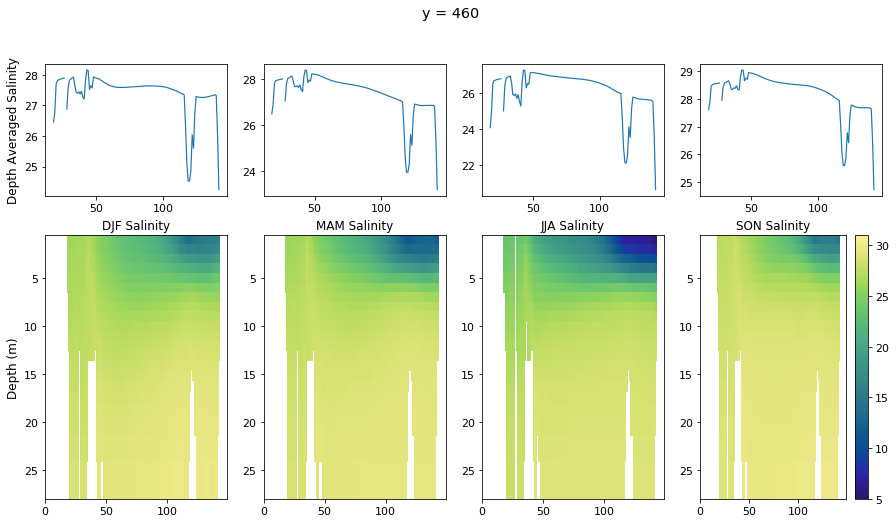

In [57]:
fig, ax = plt.subplots(2,4,figsize = (15,8), gridspec_kw = {'height_ratios':[1, 2]} )
for n in range(4):
    u = np.ma.masked_array(k.variables['vosaline'][n,:,460,200:350],
                           mask = 1 - mesh.variables['tmask'][0,:22,460,200:350])
    averaged = np.sum((u * maska), axis=1) / np.sum(maska, axis = 1)
    ax[0,n].plot(averaged[0,:])
ax[0,0].set_ylabel('Depth Averaged Salinity')
ax[1,0].pcolormesh(np.arange(150), deptht, 
                 np.ma.masked_array(k.variables['vosaline'][0,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,0].set_title('DJF Salinity')
ax[1,1].pcolormesh(np.arange(150), deptht,
                np.ma.masked_array(k.variables['vosaline'][1,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,1].set_title('MAM Salinity')
ax[1,2].pcolormesh(np.arange(150), deptht,
                np.ma.masked_array(k.variables['vosaline'][2,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,2].set_title('JJA Salinity')
h = ax[1,3].pcolormesh(np.arange(150), deptht,
                     np.ma.masked_array(k.variables['vosaline'][3,:,460,200:350],
                                   mask = 1 - mesh.variables['tmask'][0,:22,460,200:350]),
                     cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
fig.colorbar(h, ax=ax[1,3])
ax[1,3].set_title('SON Salinity')
for a in ax[1,:]:
    a.set_ylim(28,0.5)
fig.suptitle('y = 460')
ax[1, 0].set_ylabel('Depth (m)');

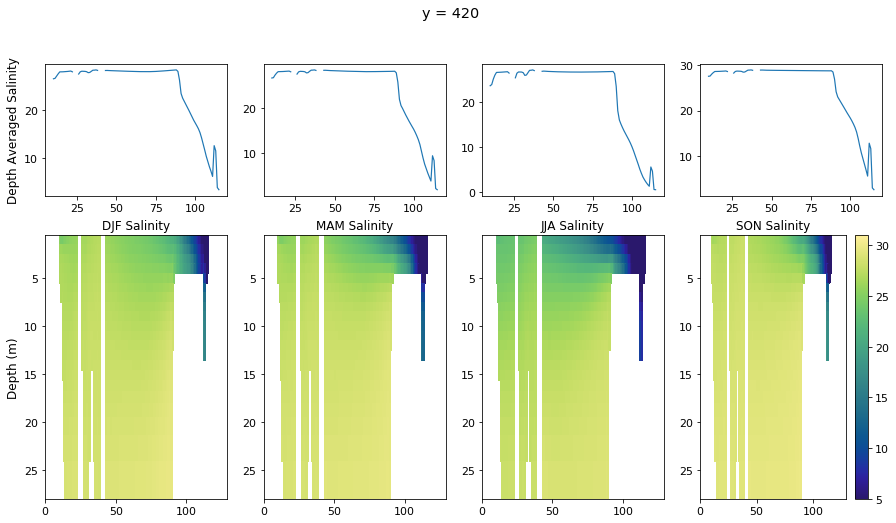

In [56]:
fig, ax = plt.subplots(2,4,figsize = (15,8), gridspec_kw = {'height_ratios':[1, 2]} )
for n in range(4):
    u = np.ma.masked_array(k.variables['vosaline'][n,:,420,200:330],
                           mask = 1 - mesh.variables['tmask'][0,:22,420,200:330])
    averaged = np.sum((u * maskb), axis=1) / np.sum(maskb, axis = 1)
    ax[0,n].plot(averaged[0,:])
ax[0,0].set_ylabel('Depth Averaged Salinity')
ax[1,0].pcolormesh(np.arange(130), deptht, 
                 np.ma.masked_array(k.variables['vosaline'][0,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,0].set_title('DJF Salinity')
ax[1,1].pcolormesh(np.arange(130), deptht,
                np.ma.masked_array(k.variables['vosaline'][1,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,1].set_title('MAM Salinity')
ax[1,2].pcolormesh(np.arange(130), deptht,
                np.ma.masked_array(k.variables['vosaline'][2,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
ax[1,2].set_title('JJA Salinity')
h = ax[1,3].pcolormesh(np.arange(130), deptht,
                     np.ma.masked_array(k.variables['vosaline'][3,:,420,200:330],
                                   mask = 1 - mesh.variables['tmask'][0,:22,420,200:330]),
                     cmap = cmocean.cm.haline, vmin = 5, vmax = 31)
fig.colorbar(h, ax=ax[1,3])
ax[1,3].set_title('SON Salinity')
for a in ax[1,:]:
    a.set_ylim(28,0.5)
fig.suptitle('y = 420')
ax[1, 0].set_ylabel('Depth (m)');